In [5]:
import clip
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

clip_model, _ = clip.load("ViT-B/32", device="cuda")
clip_model.eval()
from torchvision.transforms import Compose, Resize, CenterCrop, Normalize, InterpolationMode
clip_preprocess = Compose([
    Resize(size=224, interpolation=InterpolationMode.BICUBIC, max_size=None, antialias=None), 
    CenterCrop(size=(224, 224)), 
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711)),
    ])

data_path = "data/toy/undistort/images"

# all jpg files in the data_path
file_names = [f for f in os.listdir(data_path) if f.endswith('.JPG')]
print(file_names)

# load image
images = [torch.tensor(plt.imread(os.path.join(data_path, f)).astype(np.float32)).permute(2, 0, 1) for f in file_names]
images = torch.stack([clip_preprocess(image) for image in images])
print(images.shape)

['IMG_7442.JPG', 'IMG_7400.JPG', 'IMG_7403.JPG', 'IMG_7375.JPG', 'IMG_7384.JPG', 'IMG_7398.JPG', 'IMG_7390.JPG', 'IMG_7397.JPG', 'IMG_7418.JPG', 'IMG_7411.JPG', 'IMG_7419.JPG', 'IMG_7401.JPG', 'IMG_7423.JPG', 'IMG_7399.JPG', 'IMG_7415.JPG', 'IMG_7429.JPG', 'IMG_7396.JPG', 'IMG_7374.JPG', 'IMG_7452.JPG', 'IMG_7427.JPG', 'IMG_7414.JPG', 'IMG_7389.JPG', 'IMG_7388.JPG', 'IMG_7391.JPG', 'IMG_7416.JPG', 'IMG_7380.JPG', 'IMG_7428.JPG', 'IMG_7387.JPG', 'IMG_7395.JPG', 'IMG_7407.JPG', 'IMG_7379.JPG', 'IMG_7393.JPG', 'IMG_7444.JPG', 'IMG_7382.JPG', 'IMG_7402.JPG', 'IMG_7410.JPG', 'IMG_7413.JPG', 'IMG_7430.JPG', 'IMG_7448.JPG', 'IMG_7438.JPG', 'IMG_7434.JPG', 'IMG_7420.JPG', 'IMG_7405.JPG', 'IMG_7433.JPG', 'IMG_7431.JPG', 'IMG_7450.JPG', 'IMG_7392.JPG', 'IMG_7404.JPG', 'IMG_7421.JPG', 'IMG_7426.JPG', 'IMG_7449.JPG', 'IMG_7440.JPG', 'IMG_7383.JPG', 'IMG_7409.JPG', 'IMG_7394.JPG', 'IMG_7439.JPG', 'IMG_7425.JPG', 'IMG_7412.JPG', 'IMG_7453.JPG', 'IMG_7376.JPG', 'IMG_7424.JPG', 'IMG_7377.JPG', 'IMG_74

0.97119140625


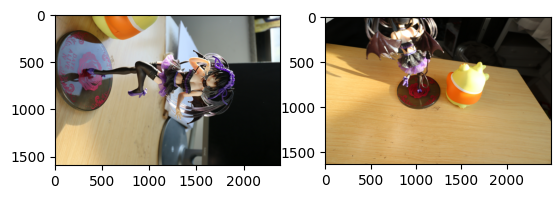

0.982421875


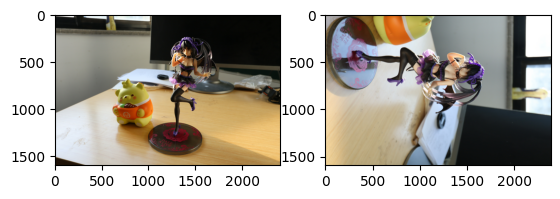

0.98046875


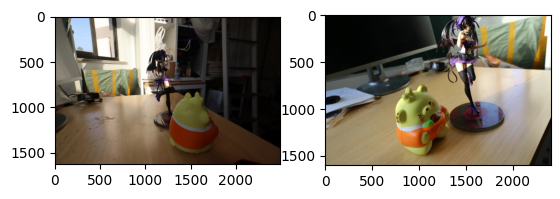

0.97802734375


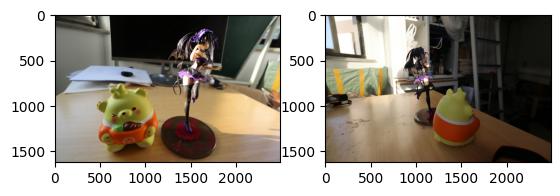

0.95849609375


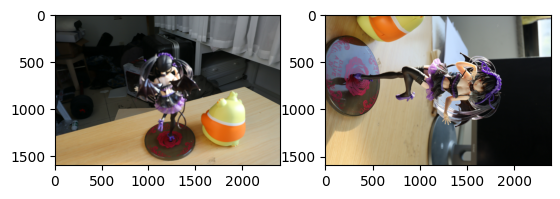

0.98193359375


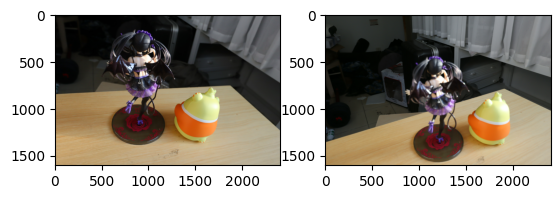

0.9697265625


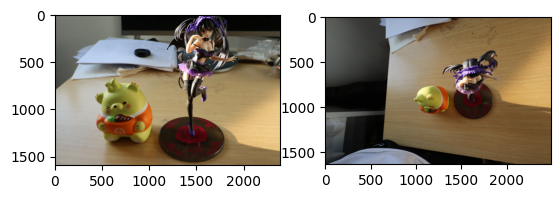

0.98291015625


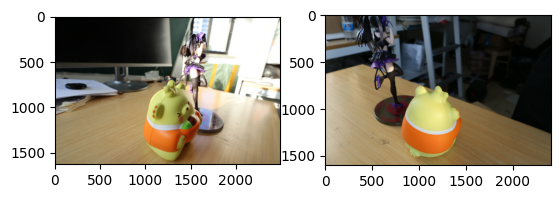

0.97607421875


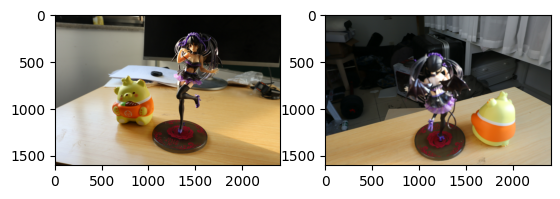

0.97998046875


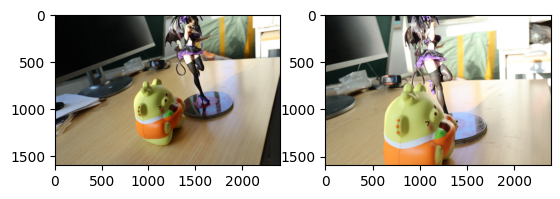

In [8]:
ep = 10
for _ in range(ep):
    # random sample two view
    indexes = np.random.choice(images.shape[0], 2, replace=False)
    img1 = images[indexes[0]].unsqueeze(0).cuda()
    img2 = images[indexes[1]].unsqueeze(0).cuda()

    # encode image
    img1_features = clip_model.encode_image(img1)
    img2_features = clip_model.encode_image(img2)

    # compute similarity
    similarity = torch.nn.functional.cosine_similarity(img1_features, img2_features)
    print(similarity.item())

    # show the two images in two subplots
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(plt.imread(os.path.join(data_path, file_names[indexes[0]])))
    axs[1].imshow(plt.imread(os.path.join(data_path, file_names[indexes[1]])))
    plt.show()







In [11]:
simi = 0.0
ep = 1000
for _ in range(ep):
    # random sample two view
    indexes = np.random.choice(images.shape[0], 2, replace=False)
    img1 = images[indexes[0]].unsqueeze(0).cuda()
    img2 = images[indexes[1]].unsqueeze(0).cuda()

    # encode image
    img1_features = clip_model.encode_image(img1)
    img2_features = clip_model.encode_image(img2)

    # compute similarity
    similarity = torch.nn.functional.cosine_similarity(img1_features, img2_features)
    simi += similarity.item()
print(simi/ep)

0.978326171875


$$simi = \frac{1}{N} \sum_{i = 1}^{N} \breket{I_i}{I_j}$$

['clip1.png', 'clip2.png', 'clip3.png', 'clip4.png']


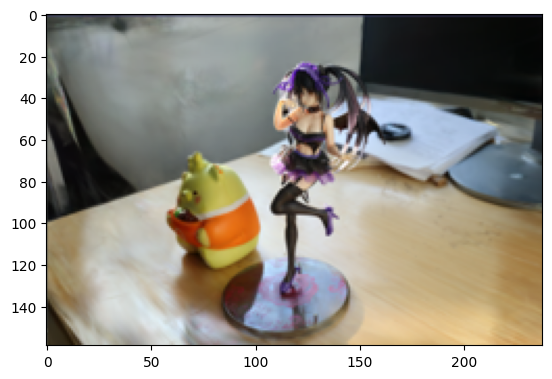

In [34]:
path = "ablation/res1/exp1"

clip_imgs = [f"clip{i}.png" for i in range(1, 5)]
print(clip_imgs)
plt.figure()
img = plt.imread(os.path.join(path, clip_imgs[0]))
# to RGB
img = img[..., :3]
plt.imshow(img)
plt.show()


0.92529296875


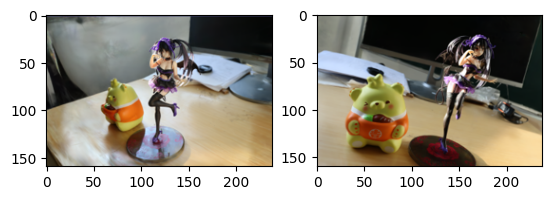

0.8212890625


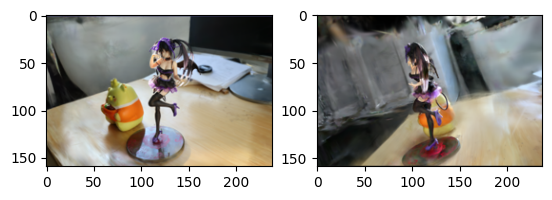

0.9482421875


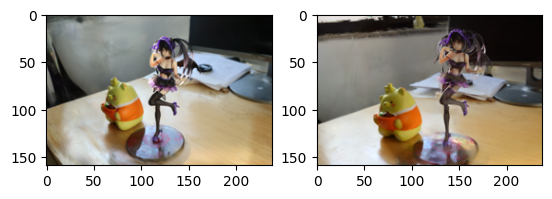

0.791015625


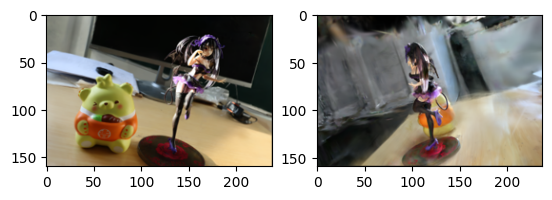

0.9326171875


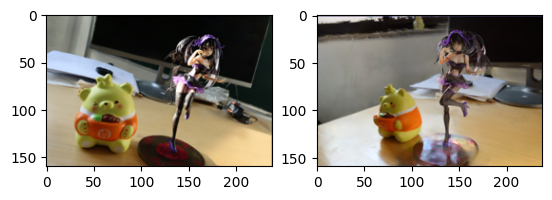

0.79345703125


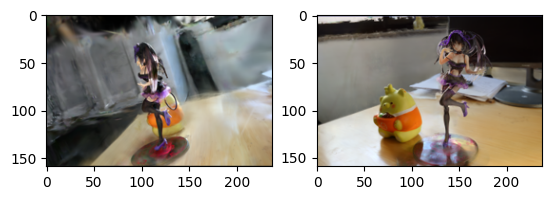

0.86865234375


In [39]:
path = "ablation/res1/exp1"

clip_imgs = [f"clip{i}.png" for i in range(1, 5)]

clip_imgs = [torch.tensor(plt.imread(os.path.join(path, f)).astype(np.float32)).permute(2, 0, 1) for f in clip_imgs]
clip_imgs = torch.stack([clip_preprocess(image[:3]) for image in clip_imgs])

simi = 0.0
ep = lambda n: n * (n + 1) / 2 - n
for i in range(4):
    for j in range(i + 1, 4):
        img1 = clip_imgs[i].unsqueeze(0).cuda()
        img2 = clip_imgs[j].unsqueeze(0).cuda()

        # encode image
        img1_features = clip_model.encode_image(img1)
        img2_features = clip_model.encode_image(img2)

        # similarity
        similarity = torch.nn.functional.cosine_similarity(img1_features, img2_features)
        print(similarity.item())

        simi += similarity.item()  

        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(plt.imread(os.path.join(path, f"clip{i + 1}.png")))
        axs[1].imshow(plt.imread(os.path.join(path, f"clip{j + 1}.png")))
        plt.show()
print(simi / ep(4))

